In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Pride and Prejudice.txt to Pride and Prejudice (1).txt


In [5]:
### load and preprocess file

In [6]:
file = open("Pride and Prejudice.txt", "r", encoding = "utf8")

# Store file in list
lines = []
for i in file:
  lines.append(i)

#converting list to string
data = ""
for i in lines:
  data = ''.join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Pride and Prejudice, by Jane AustenThis eBook is for the use of anyone anywhere in the United States andmost other parts of the world at no cost and with almost no restrictionswhatsoever. You may copy it, give it away or re-use it under the termsof the Project Gutenberg License included with this eBook or online atwww.gutenberg.org. If you are not located in the United States, youwill have to check the laws of the country where you are located beforeusing this eBoo'

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 223, 186, 912, 3, 328, 4, 1351, 30, 72, 4174, 912, 23, 21, 1]

In [8]:
len(sequence_data)

125076

In [9]:
#vocab_size= unique words
vocab_size = len(tokenizer.word_index) + 1    # not 0= bcz reserved for padding
print(vocab_size)

7200


In [10]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]        #3 words to predict next word
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  125073


array([[   1,  223,  186,  912],
       [ 223,  186,  912,    3],
       [ 186,  912,    3,  328],
       [ 912,    3,  328,    4],
       [   3,  328,    4, 1351],
       [ 328,    4, 1351,   30],
       [   4, 1351,   30,   72],
       [1351,   30,   72, 4174],
       [  30,   72, 4174,  912],
       [  72, 4174,  912,   23]])

In [11]:
#output has = 3 columns from input and 1 column is for output 

In [12]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [13]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1  223  186]
 [ 223  186  912]
 [ 186  912    3]
 [ 912    3  328]
 [   3  328    4]
 [ 328    4 1351]
 [   4 1351   30]
 [1351   30   72]
 [  30   72 4174]
 [  72 4174  912]]
Response:  [ 912    3  328    4 1351   30   72 4174  912   23]


In [14]:
y = to_categorical(y, num_classes=vocab_size)   #binary class metrics
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**CREATING THE** **MODEL**

In [16]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))  #softmax=no: to probabilities

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             72000     
                                                                 
 lstm_2 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 7200)              7207200   
                                                                 
Total params: 20,328,200
Trainable params: 20,328,200
Non-trainable params: 0
_________________________________________________________________


**Plot the model**

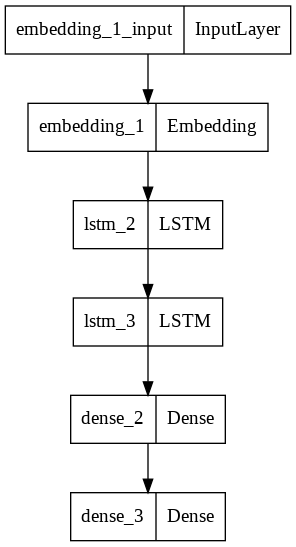

In [19]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

**Build model**

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1955/1955 [==============================] - ETA: 0s - loss: 6.2218
Epoch 00001: loss improved from inf to 6.22180, saving model to next_words.h5
1955/1955 [==============================] - 39s 15ms/step - loss: 6.2218
Epoch 2/70
1953/1955 [============================>.] - ETA: 0s - loss: 5.5947
Epoch 00002: loss improved from 6.22180 to 5.59464, saving model to next_words.h5
1955/1955 [==============================] - 30s 15ms/step - loss: 5.5946
Epoch 3/70
1955/1955 [==============================] - ETA: 0s - loss: 5.2881
Epoch 00003: loss improved from 5.59464 to 5.28806, saving model to next_words.h5
1955/1955 [==============================] - 31s 16ms/step - loss: 5.2881
Epoch 4/70
1953/1955 [============================>.] - ETA: 0s - loss: 5.0676
Epoch 00004: loss improved from 5.28806 to 5.06739, saving model to next_words.h5
1955/1955 [==============================] - 30s 15ms/step - loss: 5.0674
Epoch 5/70
1952/1955 [============================>.] - ETA: 0s 

**Prediction**

In [21]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [22]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: If you are not
['you', 'are', 'not']
entitled
Enter your line: fixed in the
['fixed', 'in', 'the']
minds
Enter your line: Monday in a
['Monday', 'in', 'a']
chaise
Enter your line: take possession before
['take', 'possession', 'before']
michaelmas
Enter your line: What is his
['What', 'is', 'his']
name
Enter your line: 0
Execution completed.....
